In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


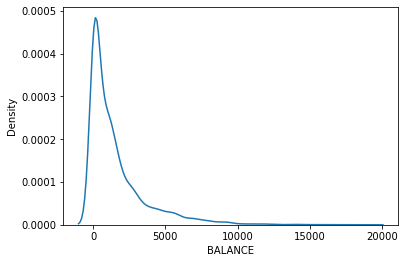

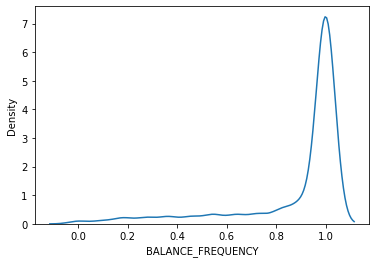

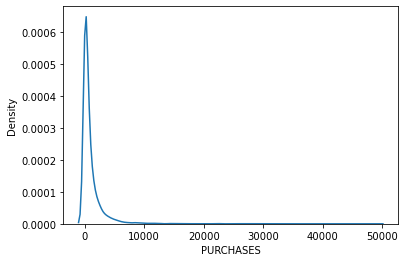

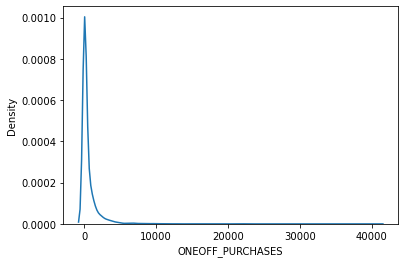

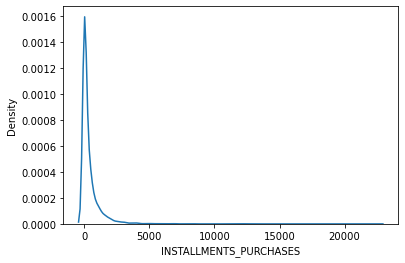

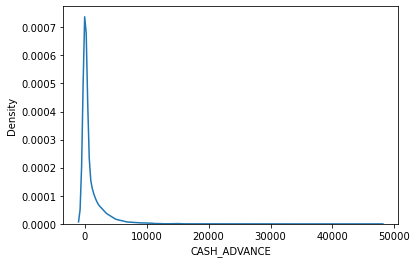

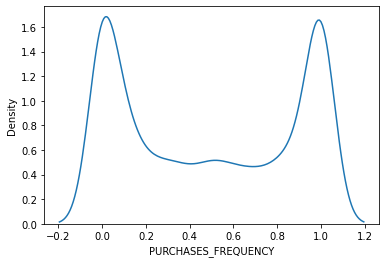

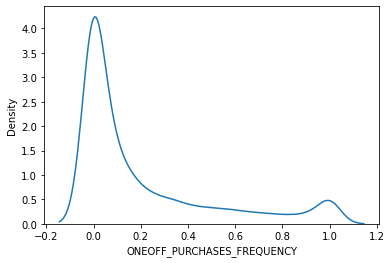

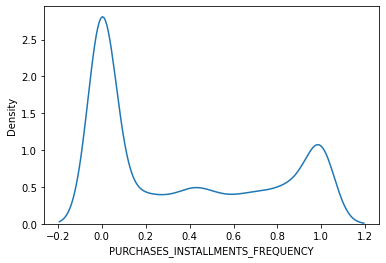

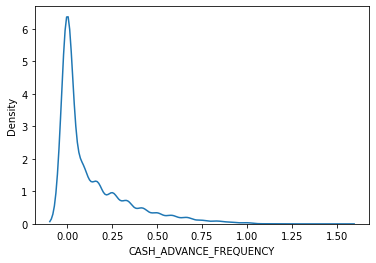

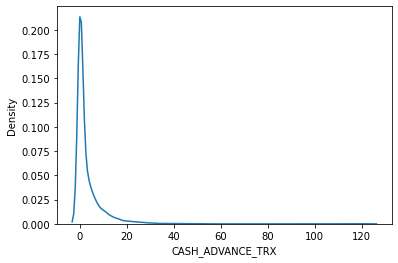

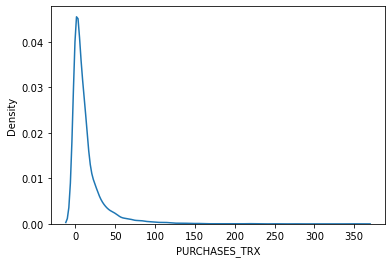

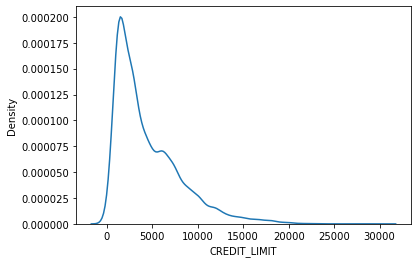

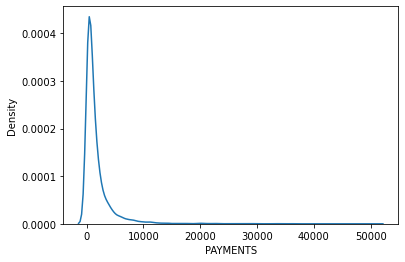

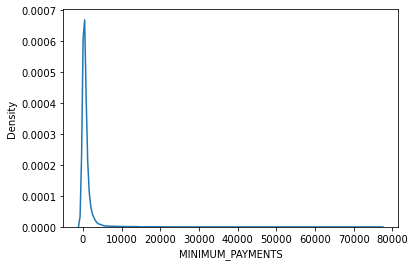

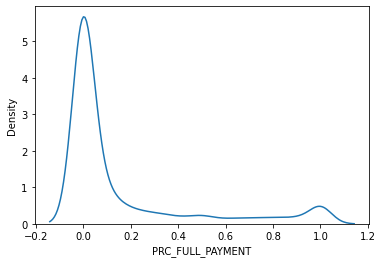

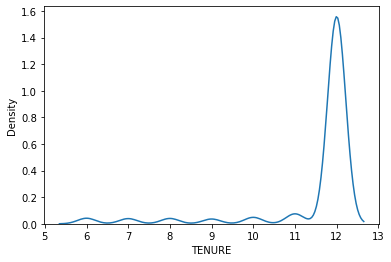

In [9]:
#df.plot(subplots=True, layout=(5,4), figsize=(30,20))
for col in df:
    res = sns.kdeplot(df[col])
    plt.show()


In [10]:
df.skew(axis=0)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [11]:
for col in df:
    df[col]=np.sqrt(df[col])

In [12]:
df.skew(axis=0)

BALANCE                             0.829498
BALANCE_FREQUENCY                  -2.819495
PURCHASES                           1.730752
ONEOFF_PURCHASES                    2.129460
INSTALLMENTS_PURCHASES              1.546939
CASH_ADVANCE                        1.486159
PURCHASES_FREQUENCY                -0.421872
ONEOFF_PURCHASES_FREQUENCY          0.724607
PURCHASES_INSTALLMENTS_FREQUENCY    0.130409
CASH_ADVANCE_FREQUENCY              0.706976
CASH_ADVANCE_TRX                    1.417779
PURCHASES_TRX                       1.185757
CREDIT_LIMIT                        0.680933
PAYMENTS                            1.951535
MINIMUM_PAYMENTS                    3.805340
PRC_FULL_PAYMENT                    1.297280
TENURE                             -3.064332
dtype: float64

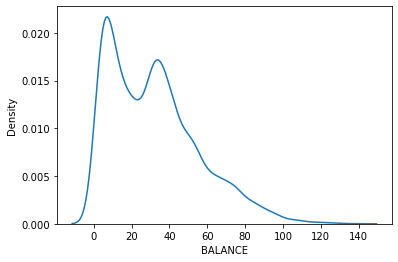

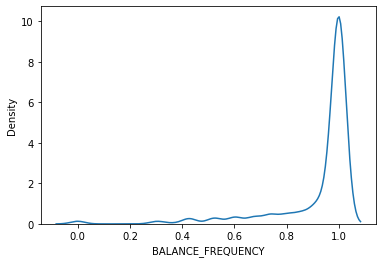

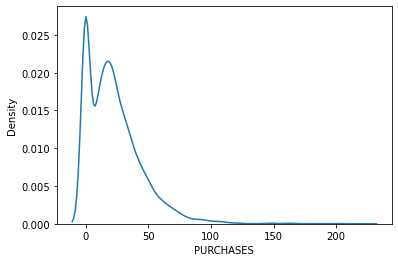

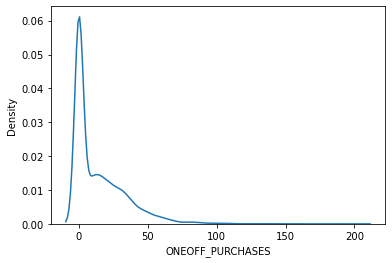

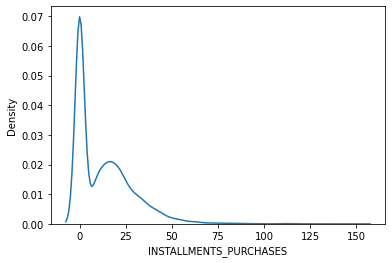

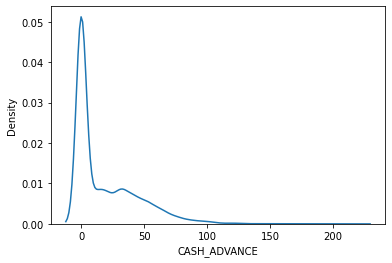

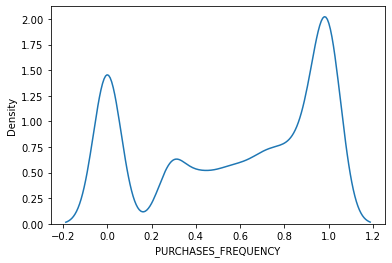

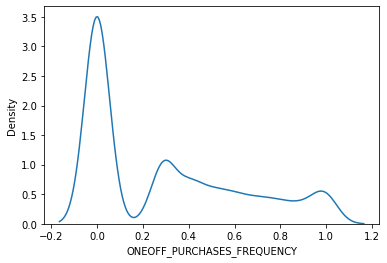

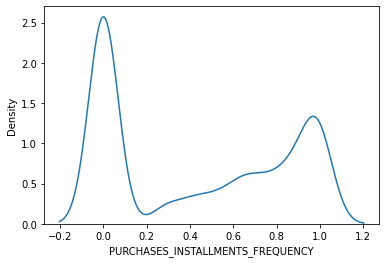

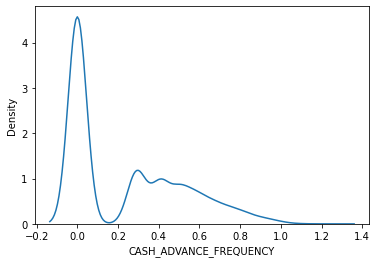

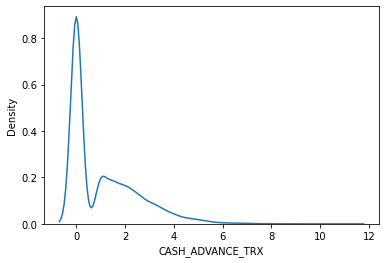

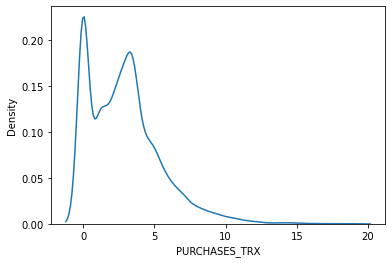

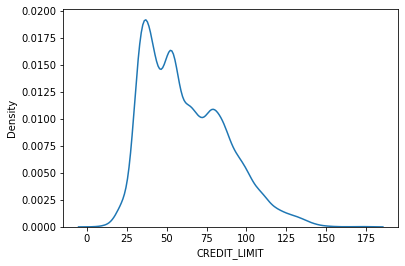

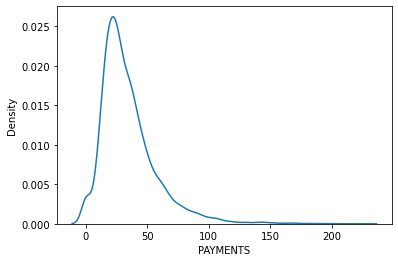

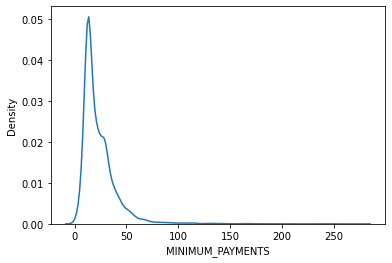

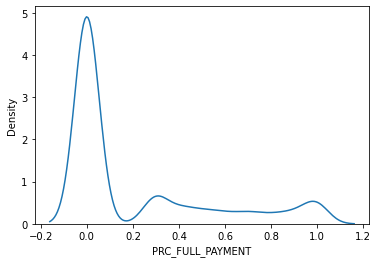

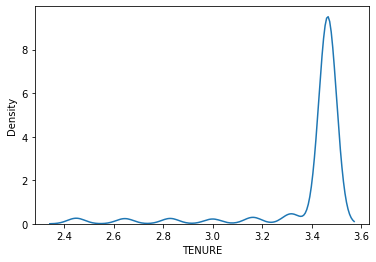

In [13]:
#df.plot(subplots=True, layout=(5,4), figsize=(30,20))
for col in df:
    res = sns.kdeplot(df[col])
    plt.show()

In [14]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.439550,0.102217,0.172933,0.013676,0.575879,-0.153306,0.102318,-0.128057,0.531558,0.525505,0.042819,0.456740,0.403422,0.663993,-0.453893,0.079000
BALANCE_FREQUENCY,0.439550,1.000000,0.166903,0.147846,0.142073,0.138545,0.154265,0.181196,0.123737,0.192852,0.180504,0.194752,0.093166,0.171135,0.192395,-0.056715,0.093694
PURCHASES,0.102217,0.166903,1.000000,0.852625,0.728559,-0.236233,0.687428,0.672055,0.527451,-0.300179,-0.254318,0.843175,0.341895,0.496092,0.079384,0.245880,0.116914
ONEOFF_PURCHASES,0.172933,0.147846,0.852625,1.000000,0.306789,-0.123410,0.422181,0.824324,0.154497,-0.156438,-0.129146,0.637828,0.352743,0.471265,0.051873,0.113810,0.090035
INSTALLMENTS_PURCHASES,0.013676,0.142073,0.728559,0.306789,1.000000,-0.230397,0.683154,0.231340,0.815592,-0.292878,-0.247026,0.757427,0.205210,0.330005,0.078573,0.269962,0.108182
CASH_ADVANCE,0.575879,0.138545,-0.236233,-0.123410,-0.230397,1.000000,-0.392948,-0.152434,-0.309058,0.834290,0.848970,-0.273181,0.261001,0.368825,0.325816,-0.233943,-0.096013
PURCHASES_FREQUENCY,-0.153306,0.154265,0.687428,0.422181,0.683154,-0.392948,1.000000,0.508031,0.831387,-0.457631,-0.397722,0.820786,0.110645,0.122729,-0.053435,0.308474,0.066970
ONEOFF_PURCHASES_FREQUENCY,0.102318,0.181196,0.672055,0.824324,0.231340,-0.152434,0.508031,1.000000,0.130807,-0.164373,-0.137542,0.627696,0.296455,0.300928,-0.009630,0.099064,0.083856
PURCHASES_INSTALLMENTS_FREQUENCY,-0.128057,0.123737,0.527451,0.154497,0.815592,-0.309058,0.831387,0.130807,1.000000,-0.366260,-0.315583,0.715472,0.058378,0.102431,-0.018277,0.275739,0.073884
CASH_ADVANCE_FREQUENCY,0.531558,0.192852,-0.300179,-0.156438,-0.292878,0.834290,-0.457631,-0.164373,-0.366260,1.000000,0.939703,-0.325492,0.100658,0.205875,0.278039,-0.305366,-0.124117


Text(0.5, 1.0, 'Correlation between different fearures')

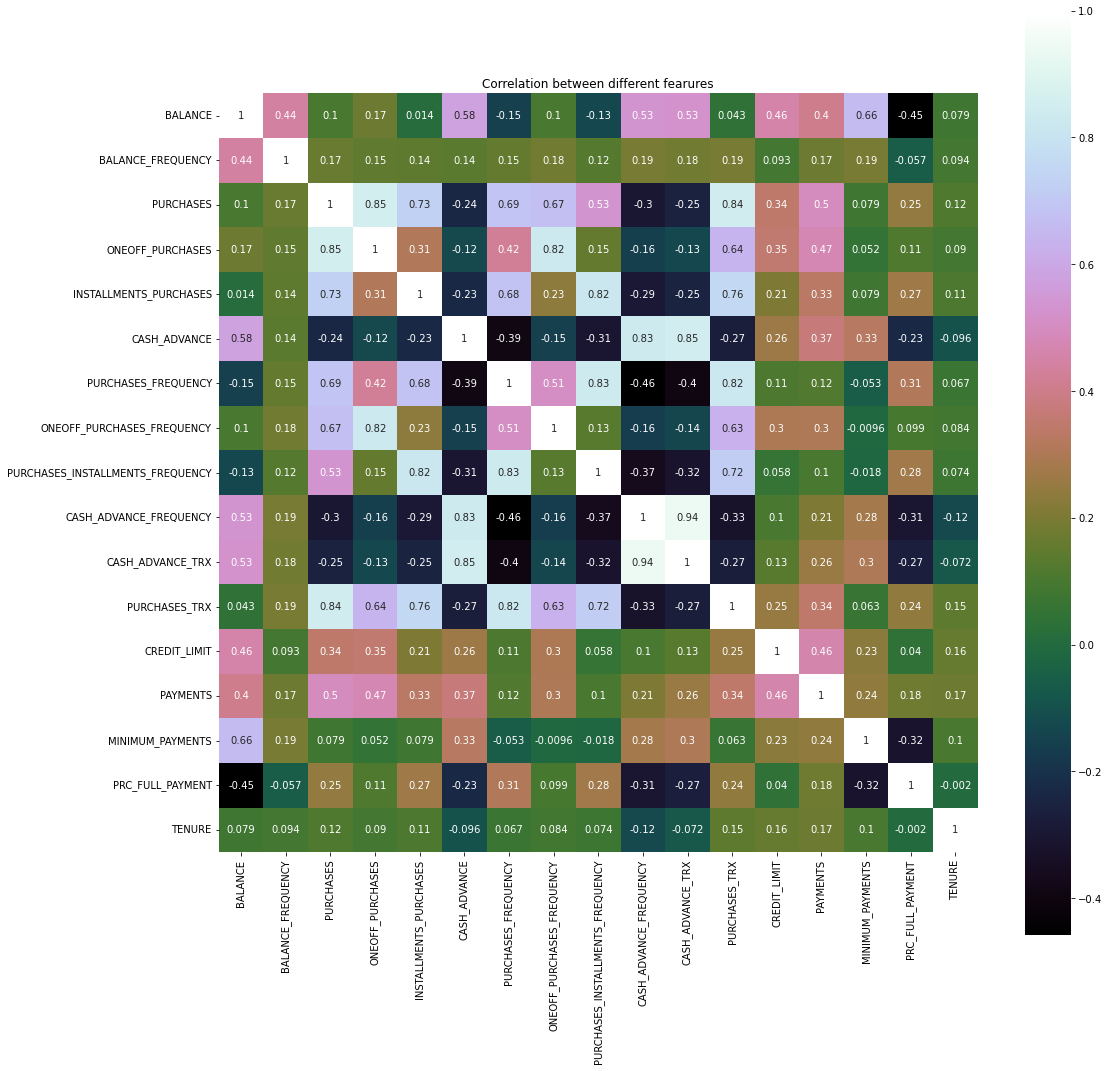

In [15]:
correlation = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [16]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.0,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.0,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.0,1.000000,86.602540,0.000000,29.397390,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.0,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102


In [17]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

In [18]:
df_std

array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.66790184,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52254404,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.08464159,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.82330785,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.91494252,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.8052387 ,
        -0.63618182, -4.27612743]])

Text(0, 0.5, 'Cumulative explained variance')

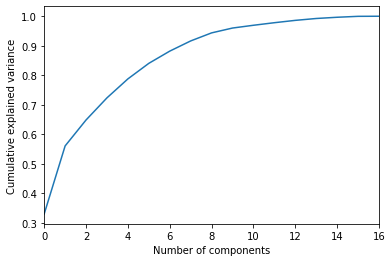

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,16,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [20]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(df_std)

In [21]:
print(Y_sklearn)

[[-0.88512191 -2.48301693  0.23090242  0.80712881  0.04336989 -0.38202562]
 [-3.00034342  2.01508943 -0.16533426 -1.08717122  1.67093843 -0.28801526]
 [ 1.19172624  0.38517395 -1.92678896  1.85933784 -0.55010278 -0.23006842]
 ...
 [ 0.10596162 -3.06675754  1.18931984 -1.77510721 -2.96585047  1.26333337]
 [-2.84716017 -2.51797947 -0.29519488 -2.14835177 -2.99036079  0.69668999]
 [-0.16460436 -0.5243077  -1.64424995 -1.31555393 -4.69253162  1.53231934]]


In [22]:
Y_sklearn.shape

(8950, 6)

In [23]:
 df = pd. DataFrame(Y_sklearn, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [24]:
df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737
...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690


In [25]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

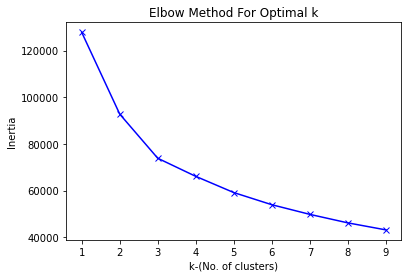

In [26]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-(No. of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

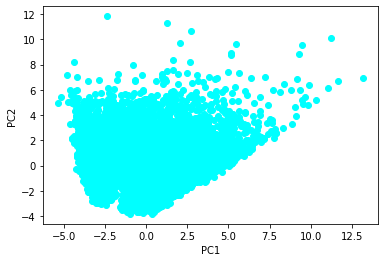

In [27]:
X = df[["PC1", "PC2","PC3","PC4","PC5","PC6"]]

plt.scatter(X["PC1"], X["PC2"], c="cyan")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

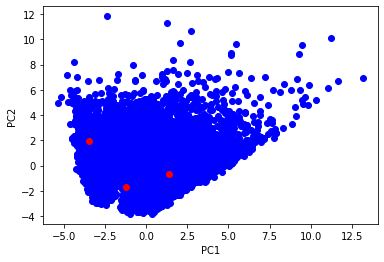

In [28]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["PC1"], X["PC2"], c="blue")
plt.scatter(Centroids["PC1"], Centroids["PC2"], c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [29]:
Centroids

,PC1,PC2,PC3,PC4,PC5,PC6
8132,1.409401,-0.669864,-3.064286,0.454880,0.326176,0.982029
6011,-1.213802,-1.712310,-0.737487,1.385211,-0.287755,-0.875701
910,-3.468620,1.941957,0.016420,-0.397702,0.736353,-0.444453


In [30]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)


KMeans(n_clusters=3, random_state=0)

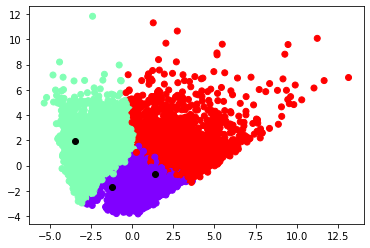

In [31]:
plt.scatter(df["PC1"], df["PC2"], c=kmeans.labels_, cmap='rainbow')


In [ ]:
# k-means without sk-learn :

In [35]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["PC1"]-row_d["PC1"])**2
            d2 = (row_c["PC2"]-row_d["PC2"])**2
            d3 = (row_c["PC3"]-row_d["PC3"])**2
            d4 = (row_c["PC4"]-row_d["PC4"])**2
            d5 = (row_c["PC5"]-row_d["PC5"])**2
            d6 = (row_c["PC6"]-row_d["PC6"])**2
            d = sqrt(d1+d2+d3+d4+d5+d6)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["PC1", "PC2","PC3","PC4","PC5", "PC6"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['PC1'] - Centroids['PC1']).sum() + (Centroids_new['PC2'] - Centroids['PC2']).sum() + (Centroids_new['PC3'] - Centroids['PC3']).sum() + (Centroids_new['PC4'] - Centroids['PC4']).sum() + (Centroids_new['PC5'] - Centroids['PC5']).sum() + (Centroids_new['PC6'] - Centroids['PC6']).sum() 
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PC2", "PC1", "PC3", "PC4", "PC5", "PC6"]]

0.19248558668062954
0.19854800900853212
0.20929143131671415
0.1331886539128911
0.071839379290971
0.08512247539929306
0.05069421003884673
0.021554692956378282
0.024506886482871602
0.01662923623659723
0.028798922678819897
-0.0017612701691556913
0.004187984804707957
0.008438866189054803
0.006670729243483008
0.008206229120003076
0.0021603402507618455
0.0


In [36]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,1,2,3,Cluster
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026,5.711459,1.949079,3.892347,2
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015,6.332207,5.424211,2.278485,3
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068,3.306090,3.433723,4.673800,1
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510,4.448837,3.139285,2.952345,3
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737,5.546809,2.545982,3.310867,2
...,...,...,...,...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981,6.443618,4.247216,6.304943,2
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628,6.333933,4.260482,5.973951,2
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333,6.710662,4.225640,6.113868,2
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690,8.006015,5.268191,5.050392,3


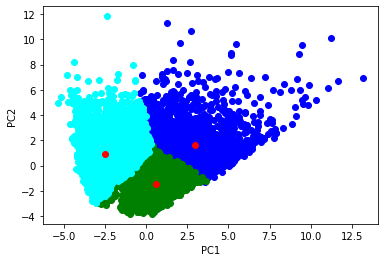

In [ ]:
# Thank You
